In [ ]:
%cd Language-Classification/code
!python main.py
%cd ../../

In [11]:
from google.colab import files
files.download('Language-Classification/results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import os
import pandas as pd

df = pd.read_csv('Language-Classification/results.csv')

In [14]:
groups = df.groupby(['classifier_name'])
summary = groups.agg({'f1-score':['mean', 'median', 'std'], 'pred_time':'mean'})
summary.columns = summary.columns.droplevel(0)
summary.columns = ['Mean', 'Median', 'Standard Deviation', 'Mean Prediction Time (sec)']
open('result.txt', 'w').write(summary.to_latex())
summary

,Mean,Median,Standard Deviation,Mean Prediction Time (sec)
classifier_name,,,,
LinearSVC,0.993372,0.998055,0.012501,0.032317
MultinomialNB,0.991299,0.997592,0.014464,0.032241
TextCat,0.977957,0.995180,0.039935,44.766117
WordRank,0.976109,0.997868,0.053298,22.278095


In [15]:
groups = df.groupby(['dataset_name', 'classifier_name'])
summary = groups.agg({'f1-score':['mean', 'median', 'std'], 'pred_time':'mean'})
summary.columns = summary.columns.droplevel(0)
summary.columns = ['Mean', 'Median', 'Standard Deviation', 'Mean Prediction Time (sec)']
open('result.txt', 'w').write(summary.to_latex())
summary.columns = ['accuracy', 'Median', 'Standard Deviation', 'Mean Prediction Time (sec)']

summary.to_csv('summary')

In [1]:
import pandas as pd
import numpy as np 
df = pd.read_csv('results.csv')
df[df['dataset_name']=='dataset2']

,precision,recall,f1-score,dataset_name,pred_time,classifier_name
100,0.983244,0.982778,0.982500,dataset2,21.500545,WordRank
101,0.974415,0.961852,0.961929,dataset2,28.748179,TextCat
102,0.996142,0.996111,0.996107,dataset2,0.028908,LinearSVC
103,0.993223,0.993148,0.993121,dataset2,0.028621,MultinomialNB
104,0.967878,0.955741,0.952086,dataset2,20.982092,WordRank
105,0.970510,0.963889,0.961500,dataset2,27.412437,TextCat
106,0.994282,0.994259,0.994254,dataset2,0.028862,LinearSVC
107,0.992401,0.992222,0.992213,dataset2,0.028176,MultinomialNB
108,0.970973,0.967778,0.966811,dataset2,21.009943,WordRank
109,0.964346,0.950741,0.950620,dataset2,28.127569,TextCat


In [2]:
import seaborn as sns
sns_colors = sns.color_palette("bright")
colors = [sns_colors[0], sns_colors[1], sns_colors[2], sns_colors[4]]

Text(0.5, 1.0, 'Classifiers Peformance')

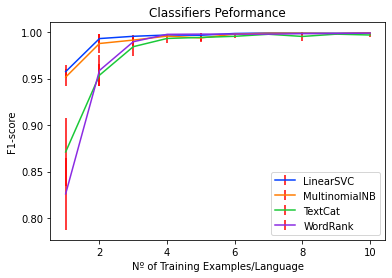

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots()


clf_names = np.unique(df['classifier_name'])
for i,clf_name in enumerate(clf_names):
  x, y, error = [], [], []
  for n in range(1, 11):
    
    accuracy = df[(df['classifier_name']==clf_name) & (df['dataset_name']=='dataset'+str(n))]['f1-score']
    x.append(n)
    y.append(accuracy.mean())
    error.append(accuracy.std())
    
  ax.errorbar(np.array(x), np.array(y), yerr=np.array(error), 
              color=colors[i],
              label=clf_name, 
              ecolor='red')
ax.legend(loc='lower right')
ax.set_ylabel('F1-score')
ax.set_xlabel('Nº of Training Examples/Language')
ax.set_title('Classifiers Peformance')

0
0
1
1


Text(0.5, 0.98, 'Time vs Peformance')

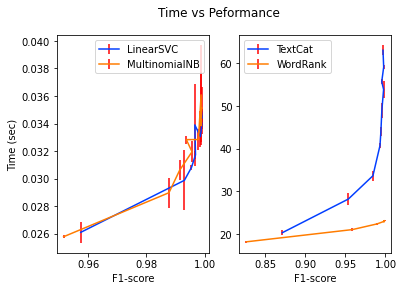

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2)
clf_names = np.unique(df['classifier_name'])
packes = [clf_names[:2], clf_names[2:]]
axis_index = [[0, 0], [0, 1], [1,0], [1, 1]]
for j, pack_clf in enumerate(packes):
  clf_names = np.unique(df['classifier_name'])
  for i,clf_name in enumerate(pack_clf):
    x, y, error = [], [], []
    for n in range(1, 11):
      
      accuracy = df[(df['classifier_name']==clf_name) & (df['dataset_name']=='dataset'+str(n))]['f1-score']
      pred_time = df[(df['classifier_name']==clf_name) & (df['dataset_name']=='dataset'+str(n))]['pred_time']
      x.append(accuracy.mean())
      y.append(pred_time.mean())
      error.append(pred_time.std())
    print(j)
    axs[j].errorbar(np.array(x), np.array(y), yerr=np.array(error), 
                color=colors[i],
                label=clf_name, 
                ecolor='red')
  

axs[0].legend(loc='best')
axs[0].set_xlabel('F1-score')
axs[0].set_ylabel('Time (sec)')
#axs[0].set_title(' ML Models')
axs[1].legend(loc='best')
axs[1].set_xlabel('F1-score')
#axs[1].set_ylabel('Time (sec)')
fig.suptitle('Time vs Peformance')

In [ ]:
clf_names

In [20]:
import numpy as np
import re
def fun(data_name):
  return re.sub('\d+','', data_name)
  
# Considerando que cada dataset é um experimento individual

clf_names = np.unique(df['classifier_name'])
df['dataset_name'] = df['dataset_name'].apply(fun)
for clf_name in clf_names:
  linear = df[df['classifier_name']==clf_name]
  df.loc[df['classifier_name']==clf_name, 'dataset_name'] = [name+str(i) for i,name in enumerate(linear['dataset_name'],1) ] 

df = pd.read_csv('Language-Classification/results.csv')

df.columns = ['precision',	'recall',	'accuracy',	'dataset_name',	'pred_time',	'classifier_name']
df.to_csv('results.csv')
df[:30]

,precision,recall,accuracy,dataset_name,pred_time,classifier_name
0,0.998346,0.998333,0.998333,dataset5,22.953727,WordRank
1,0.998545,0.998519,0.998518,dataset5,43.818154,TextCat
2,0.997796,0.997778,0.997778,dataset5,0.033106,LinearSVC
3,0.997971,0.997963,0.997963,dataset5,0.032604,MultinomialNB
4,0.996530,0.996296,0.996290,dataset5,23.061787,WordRank
5,0.996375,0.996111,0.996104,dataset5,44.024703,TextCat
6,0.993604,0.993148,0.993124,dataset5,0.032308,LinearSVC
7,0.989549,0.987222,0.986939,dataset5,0.032765,MultinomialNB
8,0.998177,0.998148,0.998148,dataset5,22.986369,WordRank
9,0.995458,0.995185,0.995180,dataset5,43.896599,TextCat
